#**Telco Customer Churn Prediction:**
###Using Machine Learning to Reduce Customer Loss



##1. INTRODUCTION
In the highly competitive telecom industry, losing customers can have a negative impact on a company's growth and profitability. Customer churn, which refers to customers switching to other providers, is a major concern for telecom companies. To address this issue, it is crucial to understand why customers leave and predict their behavior in order to take proactive measures to prevent churn and improve customer retention.

This project focuses on using machine learning techniques to develop a reliable predictive model for telco customer churn. By analyzing past customer data, we can uncover patterns and insights that help us identify factors contributing to churn. Armed with this knowledge, telecom companies can implement targeted strategies to retain customers and enhance their overall experience.

In this project, we will explore a dataset containing different customer information, including demographics, service details, and usage patterns. We will apply popular machine learning algorithms to train and evaluate models that can predict which customers are more likely to churn, allowing companies to take timely actions to retain them.

**To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.**




##2. Loading libraries and data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
# Load data
df = pd.read_excel(r'/content/Telco_customer_churn.xlsx')

##3. Understanding the data


In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


- The target the we will use to guide the exploration is **Churn**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

- We observe that the column **Total Charges** was wrongly detected as an object. This column represents the total amount charged to the customer and it is, therefore, a numeric variable.
- This problem will be solved in the *Data Manipulation* section.


**The data set includes information about:**

- **Customers who left within the last month –** the column is called Churn

- **Services that each customer has signed up for –** phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- **Customer account information -** how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- **Demographic info about customers –** gender, age range, and if they have partners and dependents

In [ ]:
df.shape

(7043, 33)

In [ ]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


##4. Visualize missing values


In [ ]:
# Assign missing values to a variable
missing_values = df.isnull().sum()

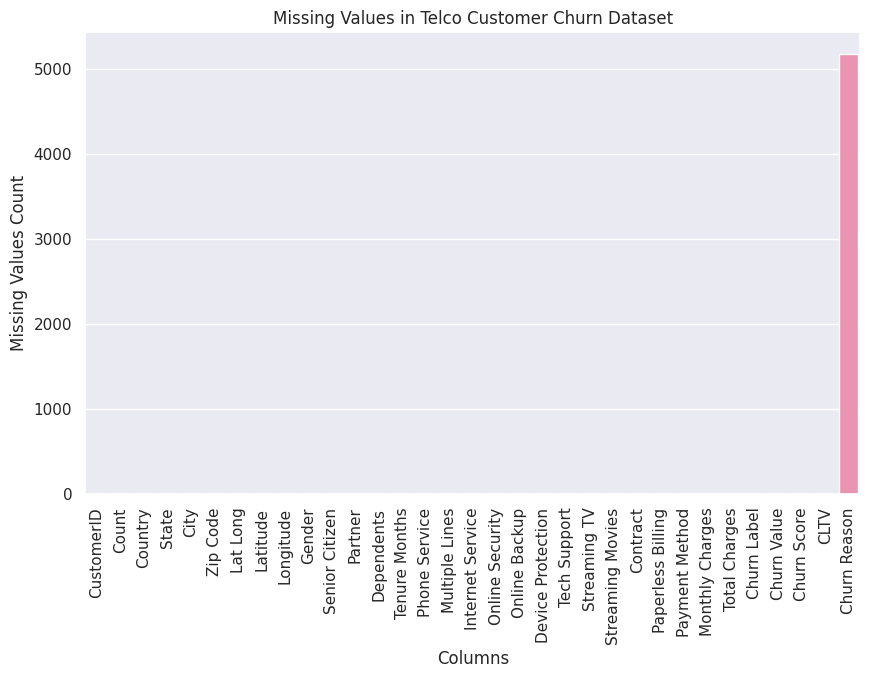

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation='vertical')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values in Telco Customer Churn Dataset')
plt.show()


##5. Data Manipulation

- The **customerID, Count, Country, State, Churn Reason, Lat Long, Churn Value** columns are useless to explain whether not the customer will churn. Therefore, we drop these columns from the data set.

In [ ]:
# List of columns to be dropped from the DataFrame
columns_to_drop = ['CustomerID', 'Count', 'Country', 'State', 'Lat Long', 'Churn Value', 'Churn Reason', 'Churn Score']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# transform the column Total Charges into a numeric data type
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df.isnull().sum()

City                  0
Zip Code              0
Latitude              0
Longitude             0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
CLTV                  0
dtype: int64

- We can now observe that the column **Total Charges** has 11 missing values.

In [ ]:
# Calculate mean total charges
mean_total_charges = df['Total Charges'].mean()

# Fill values where total charges is null with mean
df['Total Charges'].fillna(df["Total Charges"].mean(), inplace=True)

df.isnull().sum()

City                 0
Zip Code             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
CLTV                 0
dtype: int64

- As we can see below, **Payment Method** has unnecessary denominations in its values. In order not to see unnecessary denominations in the visualization part, "*(automatic)*" word will be removed.

In [ ]:
df["Payment Method"].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
# Remove the word
df['Payment Method'] = df['Payment Method'].str.replace(' (automatic)', '', regex=False)

df["Payment Method"].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer', 'Credit card'],
      dtype=object)

##6. Data Visualization

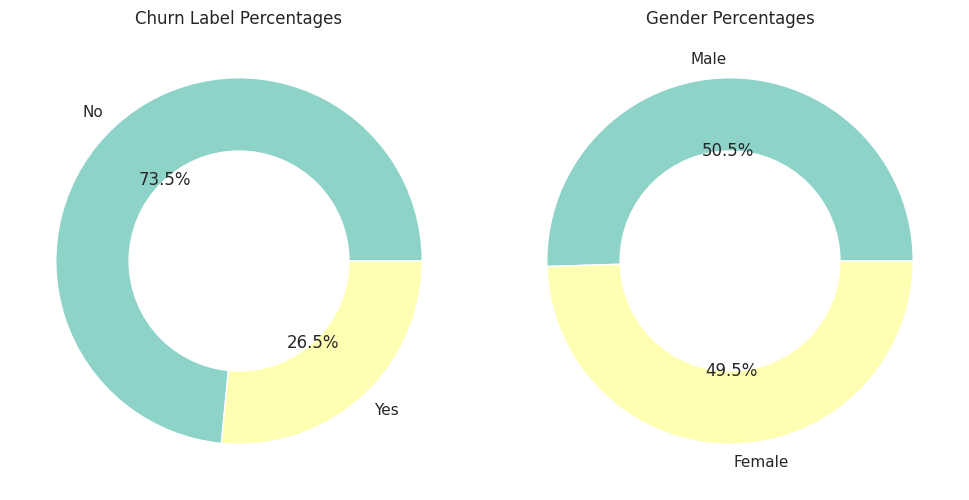

In [ ]:
# Calculate percentages of churn labels
churn_percentages = df['Churn Label'].value_counts(normalize=True) * 100

# Calculate percentages of gender
gender_percentages = df['Gender'].value_counts(normalize=True) * 100

# Set a custom color palette for the pie charts
colors = sns.color_palette('Set3')

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the pie chart for churn labels
axs[0].pie(churn_percentages, labels=churn_percentages.index, autopct='%1.1f%%', colors=colors)
axs[0].set_title('Churn Label Percentages')

# Plot the pie chart for gender
axs[1].pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', colors=colors)
axs[1].set_title('Gender Percentages')

# Add a circle at the center of each pie to make it look like a donut chart
for ax in axs:
    ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))

# Set the aspect ratio to make the pie charts appear as circles
axs[0].set_aspect('equal')
axs[1].set_aspect('equal')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


- 26.5 % of customers switched to another firm.
- Customers are 49.5 % female and 50.5 % male.

In [ ]:
# Distribution of not churned customers
df["Churn Label"][df["Churn Label"]=="No"].groupby(by=df["Gender"]).count()

Gender
Female    2549
Male      2625
Name: Churn Label, dtype: int64

In [ ]:
# Distribution of churned customers
df["Churn Label"][df["Churn Label"]=="Yes"].groupby(by=df["Gender"]).count()

Gender
Female    939
Male      930
Name: Churn Label, dtype: int64

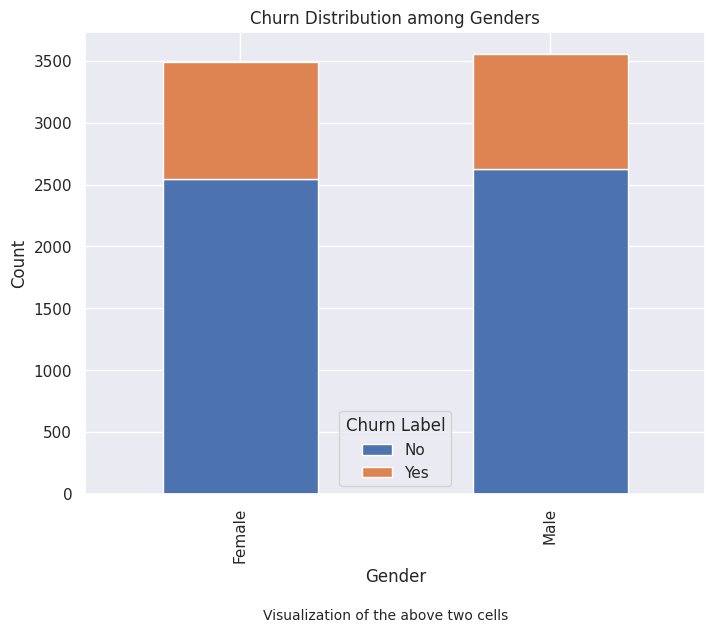

In [ ]:
# Group the data by gender and churn label, and count the occurrences
gender_churn_counts = df.groupby(['Gender', 'Churn Label']).size().unstack()

# Plot the bar plot
ax = gender_churn_counts.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Churn Distribution among Genders')

# Show legend
ax.legend(title='Churn Label')

# Add footnote
footnote_text = 'Visualization of the above two cells'
plt.figtext(0.5, -0.1, footnote_text, wrap=True, horizontalalignment='center', fontsize=10)

# Display the plot
plt.show()

- There appears to be no significant correlation between gender and churn. Gender does not seem to play a significant role in determining whether a customer will churn or not.

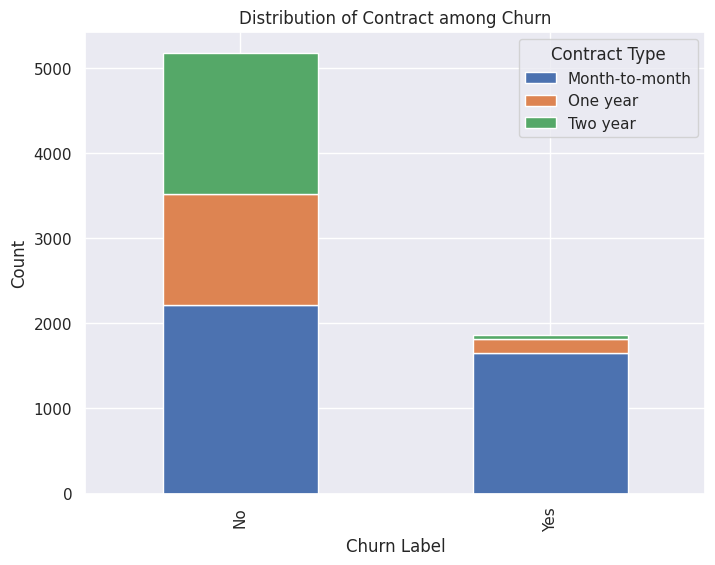

In [ ]:
# Group the data by churn label and contract type and count the occurrences
grouped_data = df.groupby(['Churn Label', 'Contract']).size().unstack()

# Plot the grouped bar plot
grouped_data.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set labels and title
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.title('Distribution of Contract among Churn')

# Show legend
plt.legend(title='Contract Type')

# Display the plot
plt.show()

- Approximately 75% of customers with a month-to-month contract chose to leave the service, while only 13% of customers with a one-year contract and 3% with a two-year contract decided to do the same.

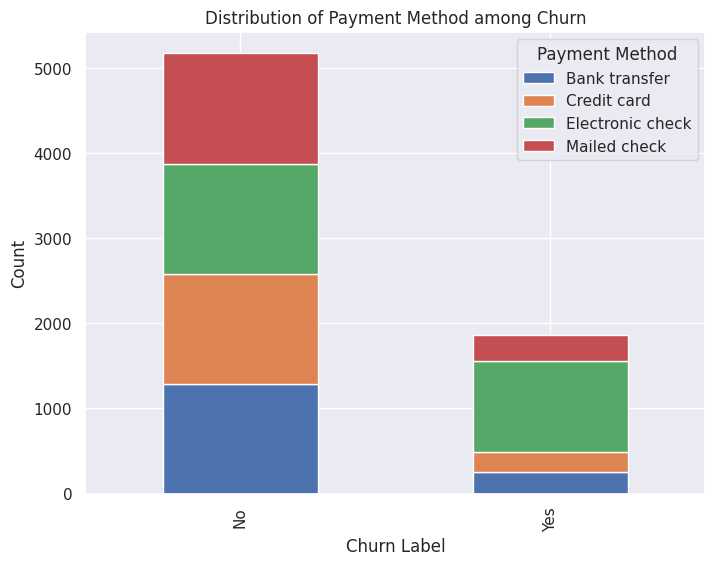

In [ ]:
# Group the data by churn label and contract type and count the occurrences
grouped_data = df.groupby(['Churn Label', 'Payment Method']).size().unstack()

# Plot the grouped bar plot
grouped_data.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set labels and title
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.title('Distribution of Payment Method among Churn')

# Show legend
plt.legend(title='Payment Method')

# Display the plot
plt.show()

- Major customers who moved out were having Electronic Check as Payment Method.
- Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [ ]:
df[df["Gender"]=="Male"][["Internet Service", "Churn Label"]].value_counts()

Internet Service  Churn Label
DSL               No             993
Fiber optic       No             910
No                No             722
Fiber optic       Yes            633
DSL               Yes            240
No                Yes             57
dtype: int64

In [ ]:
df[df["Gender"]=="Female"][["Internet Service", "Churn Label"]].value_counts()

Internet Service  Churn Label
DSL               No             969
Fiber optic       No             889
No                No             691
Fiber optic       Yes            664
DSL               Yes            219
No                Yes             56
dtype: int64

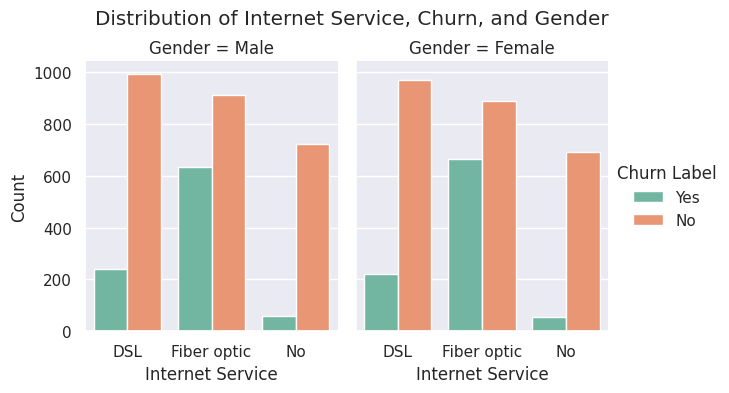

In [ ]:
# Create a categorical plot using catplot
g = sns.catplot(data=df, x="Internet Service", hue="Churn Label", col="Gender", kind="count", palette="Set2", height=4, aspect=0.8)

# Set the title
g.fig.suptitle("Distribution of Internet Service, Churn, and Gender")

# Set the axis labels
g.set_axis_labels("Internet Service", "Count")

# Set the legend title
g._legend.set_title("Churn Label")

# Adjust the spacing
plt.subplots_adjust(top=0.85)

# Show the plot
plt.show()

- A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
- Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

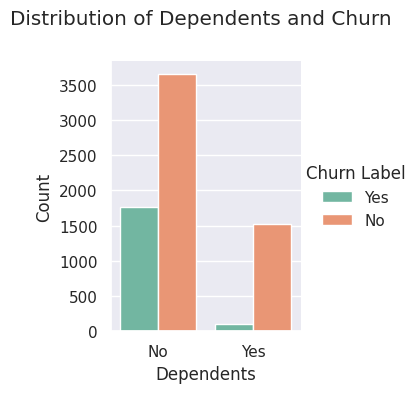

In [ ]:
# Create a categorical plot using catplot
g = sns.catplot(data=df, x="Dependents", hue="Churn Label", kind="count", palette="Set2", height=4, aspect=0.8)

# Set the title
g.fig.suptitle("Distribution of Dependents and Churn")

# Set the axis labels
g.set_axis_labels("Dependents", "Count")

# Set the legend title
g._legend.set_title("Churn Label")

# Adjust the spacing
plt.subplots_adjust(top=0.85)

# Show the plot
plt.show()

- Customers without dependents are more likely to churn.

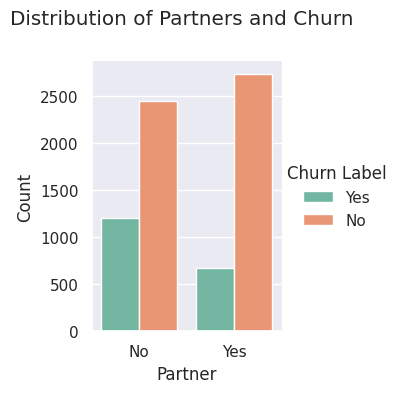

In [ ]:
# Create a categorical plot using catplot
g = sns.catplot(data=df, x="Partner", hue="Churn Label", kind="count", palette="Set2", height=4, aspect=0.8)

# Set the title
g.fig.suptitle("Distribution of Partners and Churn")

# Set the axis labels
g.set_axis_labels("Partner", "Count")

# Set the legend title
g._legend.set_title("Churn Label")

# Adjust the spacing
plt.subplots_adjust(top=0.85)

# Show the plot
plt.show()

- Customers that doesn't have partners are more likely to churn.

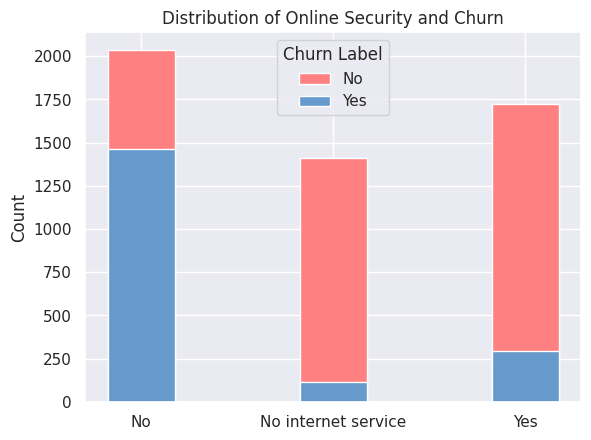

In [ ]:
# Group the data by online security and churn
grouped_data = df.groupby(['Online Security', 'Churn Label']).size().unstack()

# Set the colors for the bars
colors = ['#FF8080', '#6699CC']

# Set the width of each bar
bar_width = 0.35

# Get the positions of the bars on the x-axis
x = range(len(grouped_data))

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the bars for each churn label
for i, churn_label in enumerate(grouped_data.columns):
    ax.bar(x, grouped_data[churn_label], width=bar_width, label=churn_label, color=colors[i])

# Set the x-axis labels and tick labels
ax.set_xticks(x)
ax.set_xticklabels(grouped_data.index)

# Set the y-axis label
ax.set_ylabel('Count')

# Set the chart title
ax.set_title('Distribution of Online Security and Churn')

# Add a legend
ax.legend(title='Churn Label')

# Show the plot
plt.show()

- Plot shows that churn occurs most likely in the absence of online internet security.

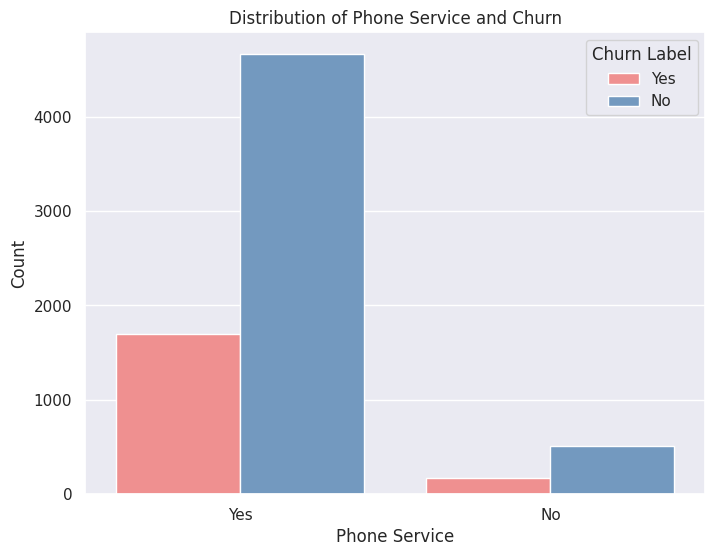

In [ ]:
# Set the colors for the plot
colors = ['#FF8080', '#6699CC']

# Create a countplot using seaborn
sns.set(style='darkgrid')
plt.figure(figsize=(8, 6))
sns.countplot(x='Phone Service', hue='Churn Label', data=df, palette=colors)

# Set the plot title and labels
plt.title('Distribution of Phone Service and Churn')
plt.xlabel('Phone Service')
plt.ylabel('Count')

# Add a legend
plt.legend(title='Churn Label')

# Show the plot
plt.show()

- Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

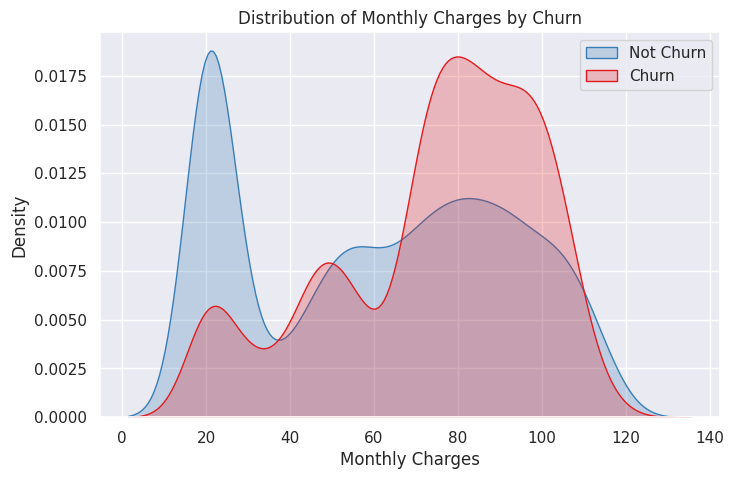

In [ ]:
# Create a KDE plot using seaborn
sns.set(style='darkgrid')
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Monthly Charges', hue='Churn Label', fill=True, common_norm=False, palette='Set1')

# Set the plot title and labels
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')

# Add a legend
plt.legend(["Not Churn","Churn"],loc='upper right')

# Show the plot
plt.show()

- Customers with higher monthly charges are more likely to churn.

##Data Preprocessing







> **Splitting data into train and test sets**


In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
0,562,90003,33.964131,-118.272783,1,0,0,0,2,1,...,0,0,0,0,1,3,53.85,108.15,1,3239
1,562,90005,34.059281,-118.307420,0,0,0,1,2,1,...,0,0,0,0,1,2,70.70,151.65,1,2701
2,562,90006,34.048013,-118.293953,0,0,0,1,8,1,...,0,2,2,0,1,2,99.65,820.50,1,5372
3,562,90010,34.062125,-118.315709,0,0,1,1,28,1,...,2,2,2,0,1,2,104.80,3046.05,1,5003
4,562,90015,34.039224,-118.266293,1,0,0,1,49,1,...,0,2,2,0,1,0,103.70,5036.30,1,5340


In [159]:
df.corr()['Churn Label'].sort_values(ascending = False)

Churn Label          1.000000
Monthly Charges      0.193356
Paperless Billing    0.191825
Senior Citizen       0.150889
Payment Method       0.107062
Multiple Lines       0.038037
Phone Service        0.011942
City                 0.008160
Longitude            0.004594
Zip Code             0.003346
Latitude            -0.003384
Gender              -0.008612
Streaming TV        -0.036581
Streaming Movies    -0.038492
Internet Service    -0.047291
CLTV                -0.127463
Partner             -0.150448
Device Protection   -0.178134
Online Backup       -0.195525
Total Charges       -0.199428
Dependents          -0.248542
Tech Support        -0.282492
Online Security     -0.289309
Tenure Months       -0.352229
Contract            -0.396713
Name: Churn Label, dtype: float64

In [ ]:
X = df.drop(columns=['Churn Label'])

y = df['Churn Label'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
# Create a distribution plot for a specific feature in a given DataFrame
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8, 3))

    plt.title("Distribution for {}".format(feature))

    ax = sns.distplot(frame[feature], color=color)

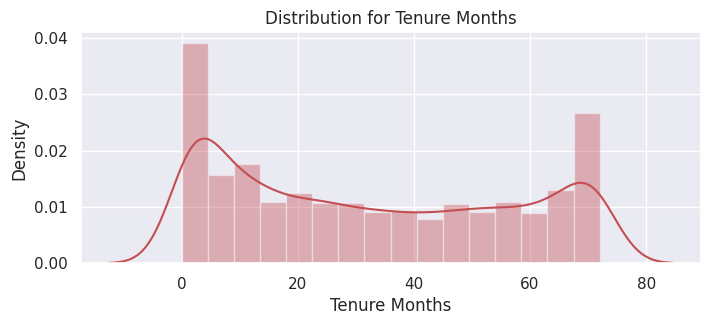

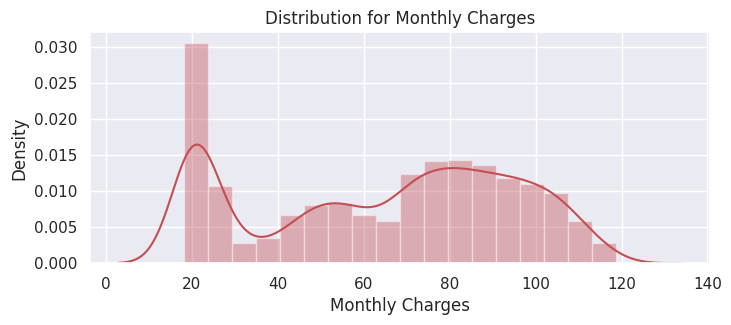

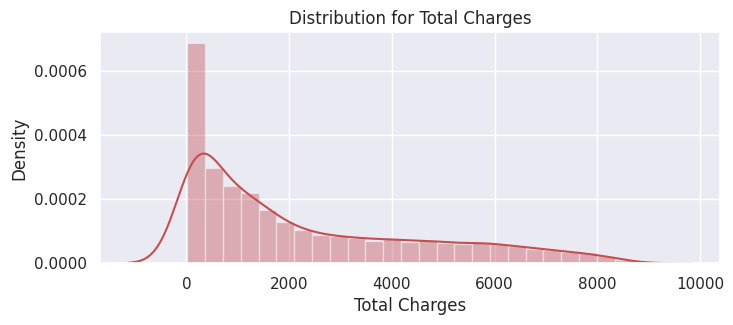

In [ ]:
num_cols = ["Tenure Months", "Monthly Charges", "Total Charges"]

# Generate distribution plots for each feature in num_cols
for feat in num_cols:
    distplot(feat, df)

- Due to the varying value ranges of the numerical features, I will utilize standard scaling to normalize them and bring them to a consistent range.




> **Standardizing numeric attributes**



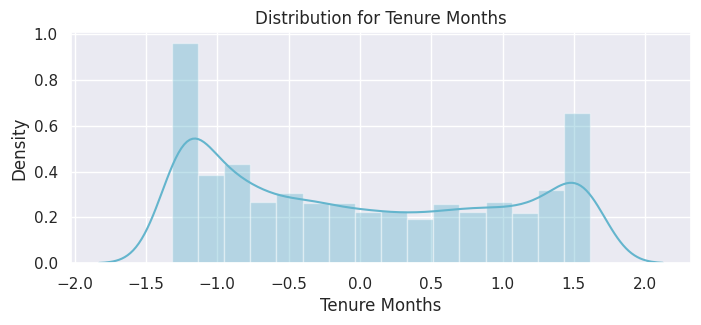

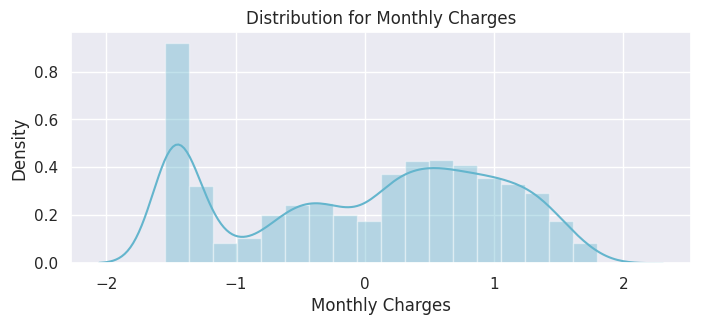

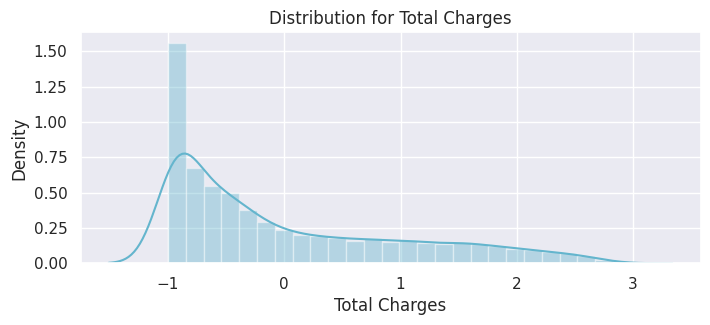

In [ ]:
# Create a df_standardized DataFrame, by applying StandardScaler to the numerical columns of df
df_standardized = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                               columns=num_cols)

# Create a distribution plot for each feature
for feat in num_cols:
    distplot(feat, df_standardized, color='c')


- We are dividing the columns into 3 categories: one for standardization, one for label encoding, one for one-hot encoding.

In [ ]:
# needed for one-hot encoding
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService']

# needed for label encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe))

In [ ]:
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Scale the numerical columns in the training set
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Scale the numerical columns in the test set using the same scaler
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Model Evaluations and Predictions

### KNN

In [ ]:
# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=11)

# Fit the KNN model
knn_model.fit(X_train, y_train)

# Make predictions
predicted_y = knn_model.predict(X_test)

# Calculate the accuracy
accuracy_knn = knn_model.score(X_test, y_test)

print("KNN accuracy:", accuracy_knn)


KNN accuracy: 0.7113109323237103


In [ ]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1552
           1       0.33      0.08      0.13       561

    accuracy                           0.71      2113
   macro avg       0.53      0.51      0.48      2113
weighted avg       0.63      0.71      0.64      2113



### Support Vector Machine

In [ ]:
# Create an SVM model
svc_model = SVC(random_state=1)

# Fit the SVM model
svc_model.fit(X_train, y_train)

# Make predictions
predicted_y = svc_model.predict(X_test)

# Calculate the accuracy
accuracy_svc = svc_model.score(X_test, y_test)

print("SVM accuracy:", accuracy_svc)


SVM accuracy: 0.73450070989115


In [ ]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113



### Random Forest

In [ ]:
# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1,
                                  random_state=50, max_features="auto",
                                  max_leaf_nodes=30)

# Fit the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions
prediction_test = rf_model.predict(X_test)

# Calculate the accuracy
accuracy_rf = metrics.accuracy_score(y_test, prediction_test)

print("Random Forest accuracy:", accuracy_rf)


Random Forest accuracy: 0.8026502602934217


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.67      0.50      0.57       561

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



### Logistic Regression

In [ ]:
# Create a Logistic Regression model
lr_model = LogisticRegression()

# Fit the Logistic Regression model
lr_model.fit(X_train, y_train)

# Calculate the accuracy
accuracy_lr = lr_model.score(X_test, y_test)

print("Logistic Regression accuracy:", accuracy_lr)

Logistic Regression accuracy: 0.7823000473260767


In [ ]:
print(classification_report(y_test,lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1552
           1       0.60      0.53      0.56       561

    accuracy                           0.78      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.77      0.78      0.78      2113



### Decision Tree

In [ ]:
# Create a Decision Tree model
dt_model = DecisionTreeClassifier()

# Fit the Decision Tree model
dt_model.fit(X_train, y_train)

# Make predictions
predictdt_y = dt_model.predict(X_test)

# Calculate the accuracy
accuracy_dt = dt_model.score(X_test, y_test)

print("Decision Tree accuracy:", accuracy_dt)

Decision Tree accuracy: 0.7335541883577852


In [ ]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1552
           1       0.50      0.50      0.50       561

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



### AdaBoost

In [ ]:
# Create an AdaBoost Classifier model
ab_model = AdaBoostClassifier()

# Fit the model
ab_model.fit(X_train, y_train)

# Make predictions
ab_preds = ab_model.predict(X_test)

# Calculate the accuracy
accuracy_ab = metrics.accuracy_score(y_test, ab_preds)

print("AdaBoost Classifier accuracy:", accuracy_ab)


AdaBoost Classifier accuracy: 0.7936583057264552


In [ ]:
print(classification_report(y_test, ab_preds))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1552
           1       0.62      0.59      0.60       561

    accuracy                           0.79      2113
   macro avg       0.74      0.73      0.73      2113
weighted avg       0.79      0.79      0.79      2113



### Gradient Boosting

In [ ]:
# Create an instance of GradientBoostingClassifier
gb_model = GradientBoostingClassifier()

# Train the model using the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
gb_pred = gb_model.predict(X_test)

print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8078561287269286


In [ ]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1552
           1       0.65      0.59      0.62       561

    accuracy                           0.81      2113
   macro avg       0.75      0.74      0.75      2113
weighted avg       0.80      0.81      0.80      2113



### Dummy Classifier

In [ ]:
# Create an instance of the DummyClassifier
dc_model = DummyClassifier(random_state=40, strategy='most_frequent')

# Train the model
dc_model.fit(X_train, y_train)

# Make predictions
dc_pred = dc_model.predict(X_test)

print("Dummy Classifier", accuracy_score(y_test, dc_pred))

Dummy Classifier 0.73450070989115


In [ ]:
print(classification_report(y_test, dc_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113



## Hyperparameter Tuning
- After using algorithms with its default hyperparameters, we see that the most successfull algorithm is **Gradient Boosting Classifier** with 0.8078561287269286 accuracy.
- The RandomizedSearchCV is then used to search through different combinations of hyperparameters and find the best set. It takes the Gradient Boosting Classifier as the base model and the defined parameter grid.

In [ ]:
# Define the parameter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'],
                   'min_samples_split': [2, 3, 4, 5]}


# Define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# Fitting the model for random search
random_search.fit(X_train, y_train)

# Print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 110, 'min_samples_split': 4, 'max_features': 'log2', 'max_depth': 4}


In [ ]:
# Create an instance of GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=110, min_samples_split=4, max_features='log2', max_depth=4)

# Train the model using the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
gb_pred = gb_model.predict(X_test)

print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.808329389493611


- Following hyperparameter tuning, a slight improvement was achieved, resulting in an increased accuracy of 0.808329389493611.

